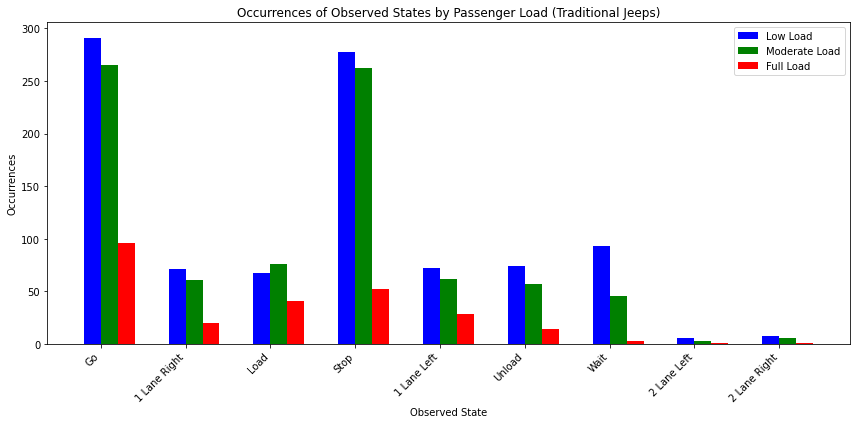

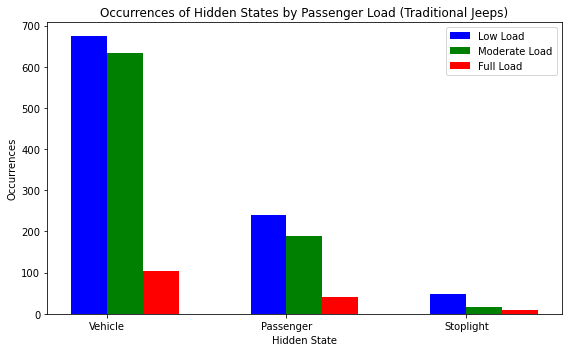

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data for observed and hidden states
observed_states_total = [595, 146, 153, 578, 150, 138, 167, 9, 15]
hidden_states_total = [1410, 468, 73]

observed_states_low = [291, 71, 68, 277, 72, 74, 93, 6, 8]
hidden_states_low = [674, 239, 47]

observed_states_moderate = [265, 61, 76, 262, 62, 57, 46, 3, 6]
hidden_states_moderate = [633, 188, 17]

observed_states_full = [96, 20, 41, 52, 29, 14, 3, 1, 1]
hidden_states_full = [103, 41, 9]

# Labels for the observed and hidden states
observed_labels = ['Go', '1 Lane Right', 'Load', 'Stop', '1 Lane Left', 'Unload', 'Wait', '2 Lane Left', '2 Lane Right']
hidden_labels = ['Vehicle', 'Passenger', 'Stoplight']

# Set width for bars
bar_width = 0.2
index = np.arange(len(observed_labels))  # Positions for the observed state labels

# Plotting combined observed states
plt.figure(figsize=(12, 6))

# Plotting observed states side by side

plt.bar(index + bar_width, observed_states_low, bar_width, label='Low Load', color='b')
plt.bar(index + 2 * bar_width, observed_states_moderate, bar_width, label='Moderate Load', color='g')
plt.bar(index + 3 * bar_width, observed_states_full, bar_width, label='Full Load', color='r')

plt.title('Occurrences of Observed States by Passenger Load (Traditional Jeeps)')
plt.xlabel('Observed State')
plt.ylabel('Occurrences')
plt.xticks(index + bar_width * 1.5, observed_labels, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Set width for bars (for hidden states)
index_hidden = np.arange(len(hidden_labels))

# Plotting combined hidden states
plt.figure(figsize=(8, 5))

# Plotting hidden states side by side

plt.bar(index_hidden + bar_width, hidden_states_low, bar_width, label='Low Load', color='b')
plt.bar(index_hidden + 2 * bar_width, hidden_states_moderate, bar_width, label='Moderate Load', color='g')
plt.bar(index_hidden + 3 * bar_width, hidden_states_full, bar_width, label='Full Load', color='r')

plt.title('Occurrences of Hidden States by Passenger Load (Traditional Jeeps)')
plt.xlabel('Hidden State')
plt.ylabel('Occurrences')
plt.xticks(index_hidden + bar_width * 1.5, hidden_labels)
plt.legend()
plt.tight_layout()
plt.show()


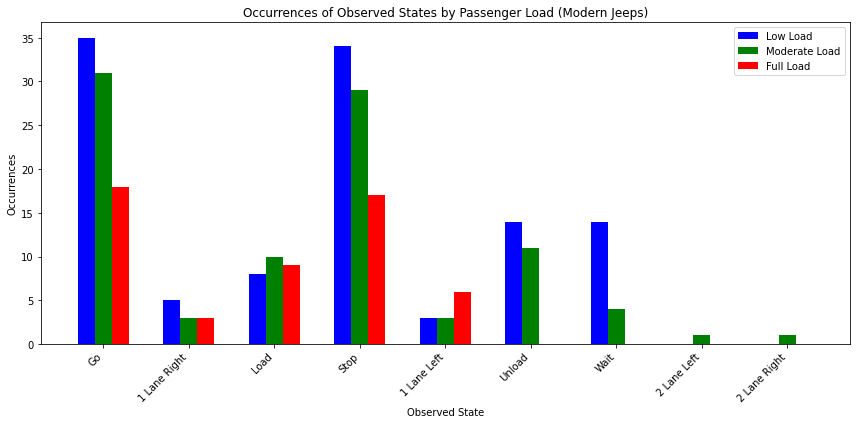

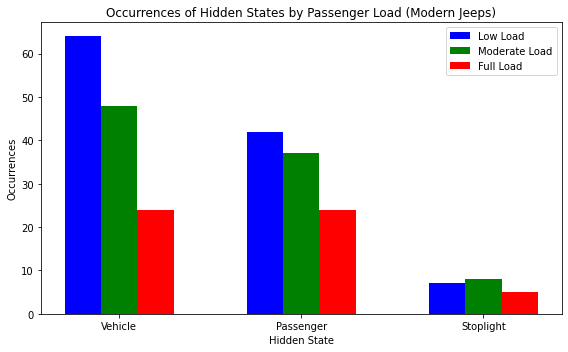

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Data for observed and hidden states
observed_states_low = [35, 5, 8, 34, 3, 14, 14, 0, 0]
hidden_states_low = [64, 42, 7]

observed_states_moderate = [31, 3, 10, 29, 3, 11, 4, 1, 1]
hidden_states_moderate = [48, 37, 8]

observed_states_full = [18, 3, 9, 17, 6, 0, 0, 0, 0]
hidden_states_full = [24, 24, 5]

# Labels for the observed and hidden states
observed_labels = ['Go', '1 Lane Right', 'Load', 'Stop', '1 Lane Left', 'Unload', 'Wait', '2 Lane Left', '2 Lane Right']
hidden_labels = ['Vehicle', 'Passenger', 'Stoplight']

# Set width for bars
bar_width = 0.2
index = np.arange(len(observed_labels))  # Positions for the observed state labels

# Plotting combined observed states
plt.figure(figsize=(12, 6))

# Plotting observed states side by side
plt.bar(index, observed_states_low, bar_width, label='Low Load', color='b')
plt.bar(index + bar_width, observed_states_moderate, bar_width, label='Moderate Load', color='g')
plt.bar(index + 2 * bar_width, observed_states_full, bar_width, label='Full Load', color='r')

plt.title('Occurrences of Observed States by Passenger Load (Modern Jeeps)')
plt.xlabel('Observed State')
plt.ylabel('Occurrences')
plt.xticks(index + bar_width, observed_labels, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Set width for bars (for hidden states)
index_hidden = np.arange(len(hidden_labels))

# Plotting combined hidden states
plt.figure(figsize=(8, 5))

# Plotting hidden states side by side
plt.bar(index_hidden, hidden_states_low, bar_width, label='Low Load', color='b')
plt.bar(index_hidden + bar_width, hidden_states_moderate, bar_width, label='Moderate Load', color='g')
plt.bar(index_hidden + 2 * bar_width, hidden_states_full, bar_width, label='Full Load', color='r')

plt.title('Occurrences of Hidden States by Passenger Load (Modern Jeeps)')
plt.xlabel('Hidden State')
plt.ylabel('Occurrences')
plt.xticks(index_hidden + bar_width, hidden_labels)
plt.legend()
plt.tight_layout()
plt.show()


In [2]:
import pandas as pd
import glob
import numpy as np
from hmmlearn import hmm
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import joblib
def print_state_occurrences_by_load(sequences):
    load_groups = {0: 'Low (0 - 33%)', 1: 'Moderate (34 - 80%)', 2: 'Full (81 - 100%)'}
    for load, load_name in load_groups.items():
        observed_states = []
        hidden_states = []
        for seq in sequences:
            # Filter sequences by passenger load
            load_indices = np.where(seq[0][:, 1] == load)[0]
            if len(load_indices) > 0:
                observed_states.extend(seq[0][load_indices, 0])
                hidden_states.extend(seq[1][load_indices])
        
        # Print observed state occurrences
        print(f"\nOccurrences of observed states for Passenger Load '{load_name}':")
        print(pd.Series(observed_states).value_counts().sort_index())

        # Print hidden state occurrences
        print(f"Occurrences of hidden states for Passenger Load '{load_name}':")
        print(pd.Series(hidden_states).value_counts().sort_index())
csv_files_path = 'validation/actual/modern/*.csv'

# Get a list of all CSV files in the directory
csv_files = glob.glob(csv_files_path)

# Read and concatenate all CSV files into a single DataFrame
dataframes = [pd.read_csv(file) for file in csv_files]
combined_df = pd.concat(dataframes, ignore_index=True)

# Data preprocessing
combined_df = combined_df.drop(columns=['Suddeness', 'TimeStamp', 'Average Speed', 'Driver Behavior', 'Reason for lane change', 'Remarks'])

# Mapping categorical values to numerical values
load_map = {'Low (0 - 33 %)': 0, 'Moderate (34 - 80 %)': 1, 'Full (81 - 100%)': 2}
combined_df['Passenger Load'] = combined_df['Passenger Load'].map(load_map)

hidden_state_map = {'Vehicle': 0, 'Passenger': 1, 'Stoplight': 2}
observed_state_map = {'Go': 0, '1 Lane Right': 1, 'Load': 2, 'Stop': 3, '1 Lane Left': 4, 'Unload': 5, 'Wait': 6, '2 Lane Left': 7, '2 Lane Right': 8}

combined_df['Hidden State'] = combined_df['Hidden State'].map(hidden_state_map)
combined_df['Observed State'] = combined_df['Observed State'].map(observed_state_map)

sequences = []
start_idx = 0

for i in range(1, len(combined_df)):
    if combined_df.loc[i, 'Passenger Load'] < combined_df.loc[i-1, 'Passenger Load']:
        sequences.append((combined_df.loc[start_idx:i, ['Observed State', 'Passenger Load']].values, 
                          combined_df.loc[start_idx:i, 'Hidden State'].values))
        start_idx = i

sequences.append((combined_df.loc[start_idx:, ['Observed State', 'Passenger Load']].values, 
                  combined_df.loc[start_idx:, 'Hidden State'].values))

# Flatten sequences for HMM input
def flatten_sequences(sequences):
    return [item for sublist in sequences for item in sublist]

# Debug: Print the distribution of observed and hidden states in sequences
observed_states_flat = flatten_sequences([seq[0][:, 0] for seq in sequences])
hidden_states_flat = flatten_sequences([seq[1] for seq in sequences])

print("\nDistribution of observed states in sequences:")
print(pd.Series(observed_states_flat).value_counts().sort_index())

print("\nDistribution of hidden states in sequences:")
print(pd.Series(hidden_states_flat).value_counts().sort_index())
print_state_occurrences_by_load(sequences)

ModuleNotFoundError: No module named 'imblearn'